In [ ]:
#!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
%matplotlib inline


In [95]:
#load dataset
df = pd.read_csv("C:/Users/anuma/Downloads/A1_DST/data/zomato_df_final_data.csv")
# Understand the data
df.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [97]:
df.describe()

cost           lat           lng  rating_number        votes  \
count  10154.000000  10308.000000  10308.000000    7184.000000  7184.000000   
mean      51.153240    -32.921377    148.067359       3.283672    83.581013   
std       27.799485      8.263449     26.695402       0.454580   175.117966   
min        8.000000    -37.858473   -123.270371       1.800000     4.000000   
25%       30.000000    -33.899094    151.061061       3.000000    12.000000   
50%       45.000000    -33.872741    151.172468       3.300000    32.000000   
75%       60.000000    -33.813451    151.208940       3.600000    87.000000   
max      500.000000     51.500986    152.869052       4.900000  3236.000000   

             cost_2  
count  10154.000000  
mean       5.332974  
std        2.147115  
min        2.000000  
25%        3.699187  
50%        4.857724  
75%        6.016260  
max       40.000000

#Exploratory Data Analysis

<AxesSubplot:>

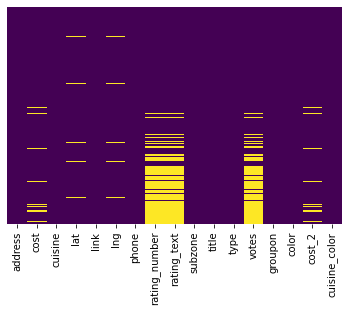

In [98]:
#missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# PART 1

In [99]:
############### PART A Section 1 Question 1 ##################


In [100]:
#Understand title and cuisine columns
df[['title','cuisine']]

title  \
0                       Sydney Madang   
1      The Grounds of Alexandria Cafe   
2                               Sokyo   
3                Bennelong Restaurant   
4                           Chat Thai   
...                               ...   
10495                  Cozy Resturant   
10496                   Lakemba Hotel   
10497                     Sushi Yogho   
10498                      Kota Sushi   
10499                          O'Siam   

                                           cuisine  
0       ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']  
1      ['Cafe', 'Coffee and Tea', 'Salad', 'Poké']  
2                                     ['Japanese']  
3                            ['Modern Australian']  
4                                ['Thai', 'Salad']  
...                                            ...  
10495                                  ['Chinese']  
10496                                ['Beverages']  
10497                                    ['Sushi']  
10498                                    ['Sushi']  
10499                                     ['Thai']  

[10500 rows x 2 columns]

In [101]:
#To slpit the cuisines
#re.sub('\]|\[|\'','', df['cuisine'][1]).split(',')
import re
unique_list =[]
dic= {}
for i in df['cuisine'] :
  temp=re.sub('\]|\[|\'', '',i).split(',')
  for j in temp:
    #print(j.strip())
    if j.strip() not in unique_list:
      unique_list.append(j.strip())
      dic[j.strip()]=1
    else:
      dic[j.strip()]=dic[j.strip()] +1


unique_list

['Hot Pot',
 'Korean BBQ',
 'BBQ',
 'Korean',
 'Cafe',
 'Coffee and Tea',
 'Salad',
 'Poké',
 'Japanese',
 'Modern Australian',
 'Thai',
 'Desserts',
 'Cantonese',
 'Chinese',
 'Yum Cha',
 'Sushi',
 'Ramen',
 'Malaysian',
 'Taiwanese',
 'Seafood',
 'Asian',
 'Italian',
 'Steak',
 'French',
 'Singaporean',
 'European',
 'Mexican',
 'Bar Food',
 'American',
 'Burger',
 'Lebanese',
 'Bakery',
 'Grill',
 'Pizza',
 'Vietnamese',
 'Cuban',
 'Latin American',
 'Irish',
 'Healthy Food',
 'Australian',
 'Fusion',
 'Patisserie',
 'Juices',
 'Vegetarian',
 'Japanese BBQ',
 'Spanish',
 'Dumplings',
 'Indonesian',
 'Indian',
 'Tapas',
 'Turkish',
 'Vegan',
 'Shanghai',
 'Tea',
 'Caribbean',
 'Sandwich',
 'Fast Food',
 'Middle Eastern',
 'German',
 'Mediterranean',
 'Pho',
 'Greek',
 'Beverages',
 'Kebab',
 'Fish and Chips',
 'Moroccan',
 'Pakistani',
 'Sri Lankan',
 'Pub Food',
 'Contemporary',
 'Teriyaki',
 'Meat Pie',
 'British',
 'Brasserie',
 'Belgian',
 'Austrian',
 'Hungarian',
 'Swiss',
 'Ch

In [102]:
#Cuisine are separated
data_dic=pd.DataFrame(dic.items(), columns=['Cusisne', 'Count'])
data_dic

Cusisne  Count
0          Hot Pot     77
1       Korean BBQ     71
2              BBQ    115
3           Korean    181
4             Cafe   3162
..             ...    ...
129      Colombian      2
130         Jewish      1
131  South African      1
132      Mongolian      1
133      Ukrainian      1

[134 rows x 2 columns]

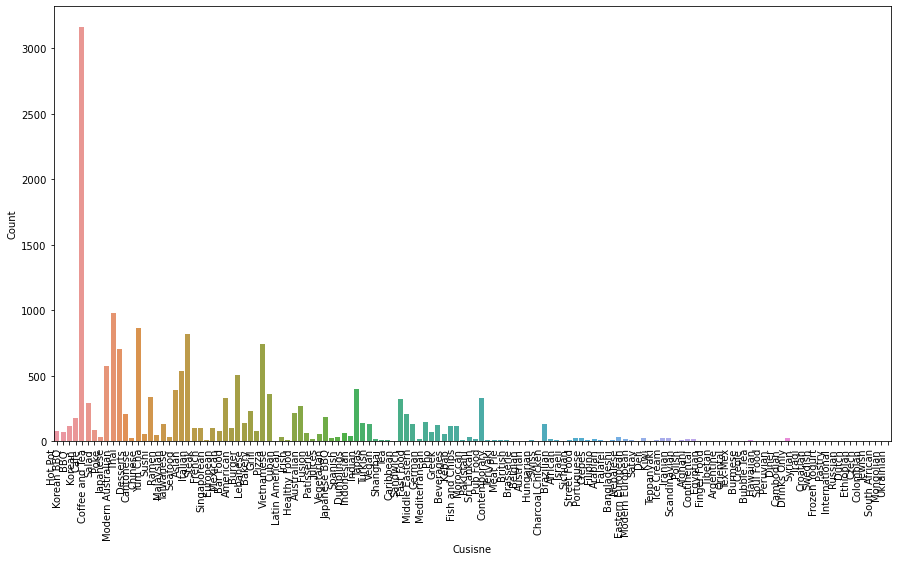

<Figure size 1080x576 with 0 Axes>

In [103]:
plt.figure(figsize=(15,8))
ax=sns.barplot(data=data_dic, x='Cusisne', y='Count')
plt.figure(figsize=(15,8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [104]:
data_dic

Cusisne  Count
0          Hot Pot     77
1       Korean BBQ     71
2              BBQ    115
3           Korean    181
4             Cafe   3162
..             ...    ...
129      Colombian      2
130         Jewish      1
131  South African      1
132      Mongolian      1
133      Ukrainian      1

[134 rows x 2 columns]

In [105]:
X=df['cuisine'].value_counts()
X[X>1]

['Cafe']                                           1745
['Thai']                                            542
['Chinese']                                         450
['Modern Australian']                               346
['Indian']                                          286
                                                   ... 
['Vietnamese', 'Juices']                              2
['Australian', 'Fast Food']                           2
['Indian', 'Bangladeshi']                             2
['Tapas', 'Yum Cha', 'Asian']                         2
['Cafe', 'Coffee and Tea', 'Modern Australian']       2
Name: cuisine, Length: 537, dtype: int64

In [106]:
###################### PART A Section 2 Question 2 #########################

<AxesSubplot:xlabel='subzone', ylabel='title'>

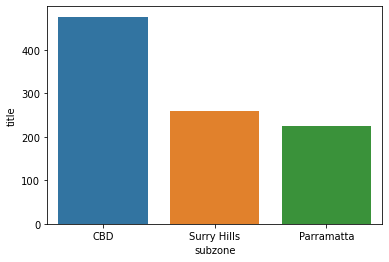

In [107]:
# Arrange subzone and title in ascending order in ordered to find the top 3 suburbs with highest number of restaurants
df2 = df.groupby(['subzone'])['title'].count().sort_values(ascending=False)
df2 = df2.reset_index()
# plot the top 3 suburbs with highest number of restaurants
sns.barplot(data=df2[df2['title']>200],x='subzone',y='title')


In [108]:
#top 3 suburbs with highest number of restaurants
df2[df2['title']>200]

subzone  title
0          CBD    476
1  Surry Hills    260
2   Parramatta    225

In [109]:
###################### PART A Section 1 Question 3 #########################

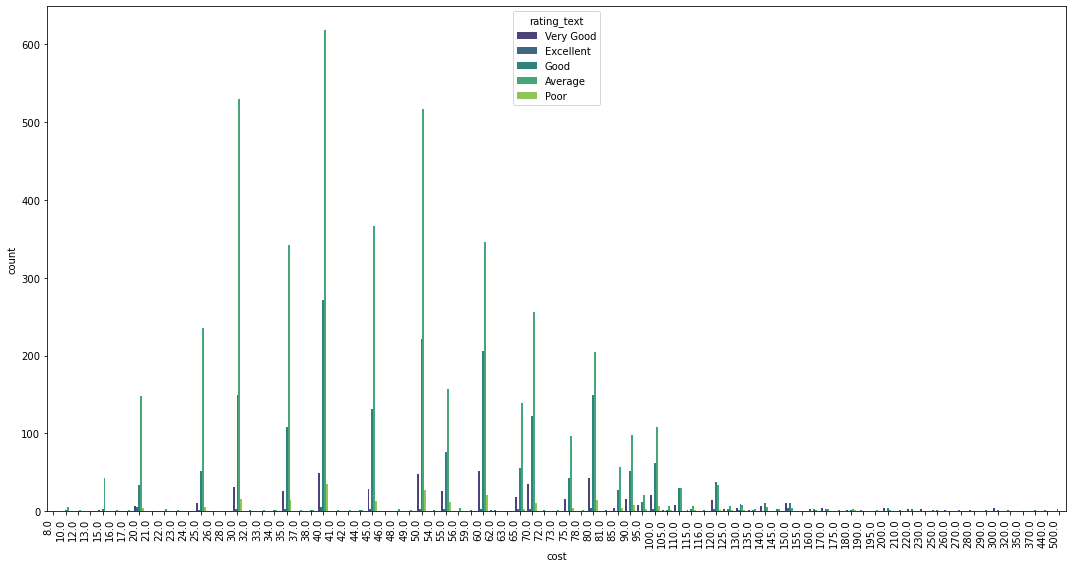

In [110]:
# plot cost vs rating
plt.figure(figsize=(15,8))
ax=sns.countplot(x='cost',data=df,hue='rating_text',palette='viridis')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()
# Excellent rating restaurants are more expensive than the poor rating restaurants

In [111]:
###################### PART A Section 2 #########################

In [112]:
# Import Dataset
df = pd.read_csv("C:/Users/anuma/Downloads/A1_DST/data/zomato_df_final_data.csv")
# column names
print(df.columns)

# summary of dataset
print(df.info())

Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  group

In [113]:
#separate the numeric columns from the categorical columns.
# select numerical columns
df_numeric = df.select_dtypes(include=[np.number])
numeric = df_numeric.columns.values
# select non-numeric columns
df_categorical = df.select_dtypes(exclude=[np.number])
categorical = df_categorical.columns.values
print("Here the categorical variables are: ", categorical)

Here the categorical variables are:  ['address' 'cuisine' 'link' 'phone' 'rating_text' 'subzone' 'title' 'type'
 'groupon' 'color' 'cuisine_color']


In [114]:
# Drop unwanted Columns
df.drop(['address','link','phone','subzone'],axis = 1,inplace=True)

# check if the target variable has any na/null values in columns
df = df.dropna(subset=['lat','rating_number', 'rating_text','lng'])

# Null Values
df.isnull().sum()

cost             100
cuisine            0
lat                0
lng                0
rating_number      0
rating_text        0
title              0
type              21
votes              0
groupon            0
color              0
cost_2           100
cuisine_color      0
dtype: int64

In [115]:
# Still we have null values in cost, type & cost_2
col_missing=['cost','type','cost_2']

#Replace null values with mode.
for i in col_missing:
    df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].mode()

#check for Null Values   
df.isnull().any()

cost              True
cuisine          False
lat              False
lng              False
rating_number    False
rating_text      False
title            False
type              True
votes            False
groupon          False
color            False
cost_2            True
cuisine_color    False
dtype: bool

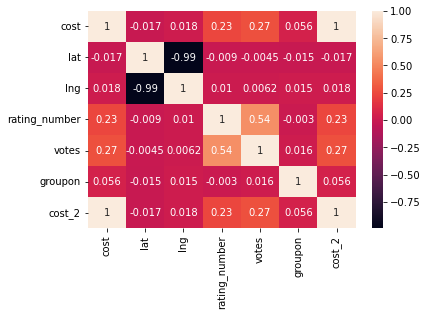

In [116]:
# correlation matrix 
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
###################### PART A Section 3 #########################

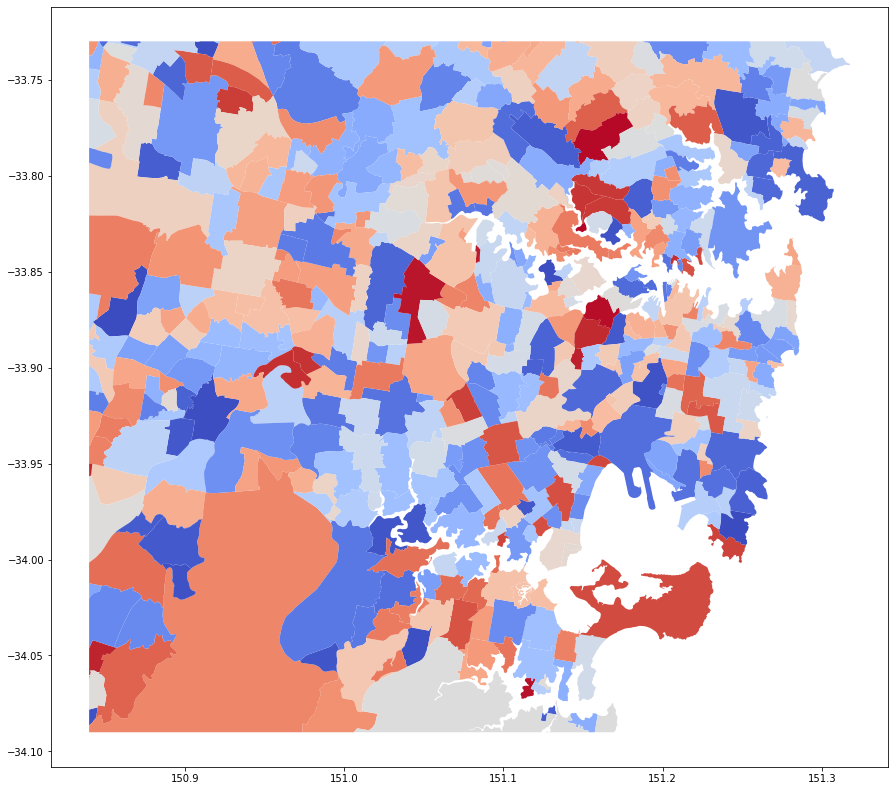

In [ ]:
import pandas as pd
import geopandas as gpd
# 1-  Listing points
listings = pd.read_csv("C:/Users/anuma/Downloads/A1_DST/data/zomato_df_final_data.csv")
df=listings[1:100]
# 2 - convert to Geopandas Geodataframe
gdf_listings = gpd.GeoDataFrame(df,   geometry=gpd.points_from_xy(df.lng, df.lat))
# 3 - Neighbourhoods
geojson_file = ("C:/Users/anuma/Downloads/A1_DST/data/sydney.geojson")
neighborhoods = gpd.read_file(geojson_file)

neighborhoods.plot(figsize=(15, 15),cmap=plt.cm.coolwarm)

In [ ]:
listings[1:100]

address   cost  \
1       Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2    Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3    Sydney Opera House, Bennelong Point, Circular...  270.0   
4               20 Campbell Street, Chinatown, Sydney   55.0   
5           46 Kensington Street, Chippendale, Sydney  150.0   
..                                                ...    ...   
95        Level 1 477 Pitt St, Haymarket, \tChinatown   90.0   
96                       1 Hosking Place, CBD, Sydney   80.0   
97                   255 King Street, Newtown, Sydney   40.0   
98   Shop 100-102, Level 2, The Strand Arcade, 412...  250.0   
99             73 Macleay Street, Potts Point, Sydney  120.0   

                                              cuisine        lat  \
1         ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                        ['Japanese'] -33.867971   
3                               ['Modern Australian'] -33.856784   
4                                   ['Thai', 'Salad'] -33.879035   
5                   ['Desserts', 'Modern Australian'] -33.885475   
..                                                ...        ...   
95  ['Chinese', 'Fusion', 'Yum Cha', 'Seafood', 'C... -33.880108   
96                                   ['Japanese BBQ'] -33.867013   
97                                        ['Italian'] -33.895812   
98                                        ['Italian'] -33.869435   
99                    ['Japanese', 'Asian', 'Fusion'] -33.869448   

                                                 link         lng  \
1   https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2         https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3   https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4   https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   
5   https://www.zomato.com/sydney/koi-dessert-bar-...  151.201953   
..                                                ...         ...   
95     https://www.zomato.com/sydney/zilver-chinatown  151.206248   
96  https://www.zomato.com/sydney/suminoya-japanes...  151.209343   
97  https://www.zomato.com/sydney/the-italian-bowl...  151.180706   
98  https://www.zomato.com/sydney/the-restaurant-p...  151.207677   
99  https://www.zomato.com/sydney/cho-cho-san-pott...  151.225251   

                         phone  rating_number rating_text  \
1                 02 9699 2225            4.6   Excellent   
2                 1800 700 700            4.9   Excellent   
3                 02 9240 8000            4.9   Excellent   
4                 02 8317 4811            4.5   Excellent   
5                 02 9212 1230            4.8   Excellent   
..                         ...            ...         ...   
95                02 9211 2232            3.8        Good   
96                02 9231 2177            4.2   Very Good   
97  02 9516 0857, 02 8018 8199            4.1   Very Good   
98                02 9231 6117            4.4   Very Good   
99                02 9331 6601            4.1   Very Good   

                                  subzone                           title  \
1   The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                       The Star, Pyrmont                           Sokyo   
3                           Circular Quay            Bennelong Restaurant   
4                               Chinatown                       Chat Thai   
5          Kensington Street, Chippendale                 KOI Dessert Bar   
..                                    ...                             ...   
95                              Chinatown                          Zilver   
96                                    CBD               Suminoya Japanese   
97                                Newtown                The Italian Bowl   
98                 The Strand Arcade, CBD        The Restaurant Pendolino   
99                            Potts Point          

In [ ]:
nyc_wifi=df

nyc_wifi_geojson = ("C:/Users/anuma/Downloads/A1_DST/data/sydney.geojson")

In [ ]:
nyc_wifi_geojson = ("C:/Users/anuma/Downloads/A1_DST/data/sydney.geojson")
nyc_wifi = gpd.read_file(nyc_wifi_geojson)  
nyc_wifi.head(5)

SSC_CODE          SSC_NAME CONF_VALUE      SQKM  \
0    10001        Abbotsbury  Very good  4.984673   
1    10002  Abbotsford (NSW)  Very good  1.017855   
2    10010    Acacia Gardens  Very good  0.946630   
3    10016             Airds  Very good  2.380773   
4    10022        Alexandria  Very good  3.503330   

                                            geometry  
0  POLYGON ((150.85118 -33.87069, 150.85104 -33.8...  
1  POLYGON ((151.12593 -33.84578, 151.12678 -33.8...  
2  POLYGON ((150.90781 -33.73547, 150.90799 -33.7...  
3  POLYGON ((150.84000 -34.07817, 150.84077 -34.0...  
4  POLYGON ((151.18603 -33.91660, 151.18562 -33.9...

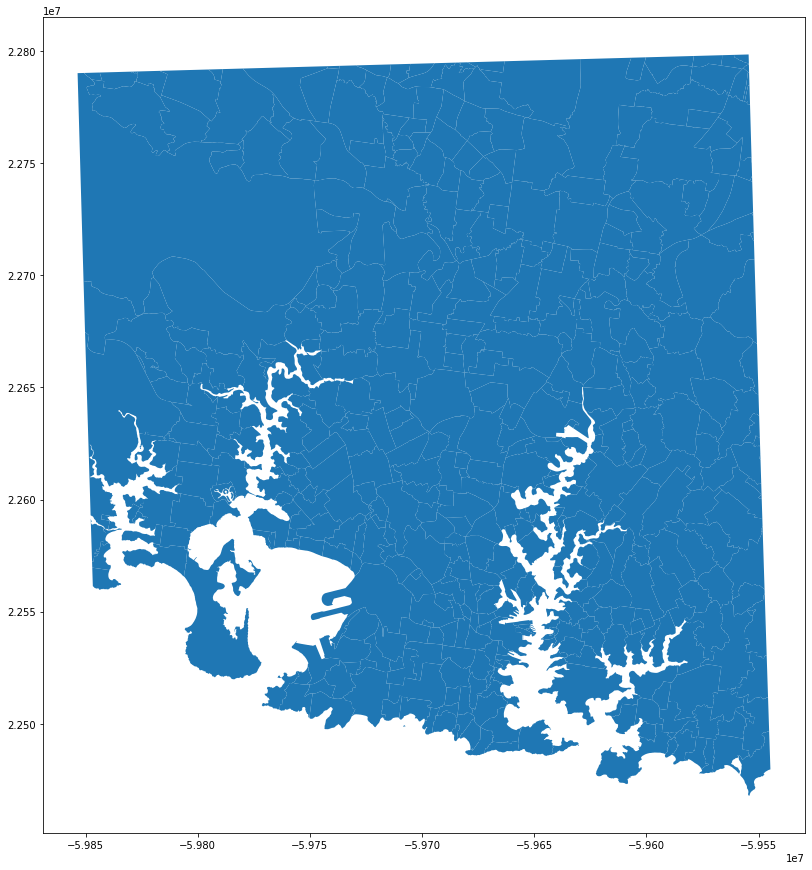

In [ ]:
nyc_wifi.columns
nyc_wifi = nyc_wifi.to_crs(epsg=2263) 
nyc_wifi.plot(figsize=(15, 15))

In [ ]:
import geopandas as gpd

listings = pd.read_csv("C:/Users/anuma/Downloads/A1_DST/data/zomato_df_final_data.csv")
geojson_file = ("C:/Users/anuma/Downloads/A1_DST/data/sydney.geojson")

data = gpd.read_file(geojson_file)

# PART 2

<AxesSubplot:>

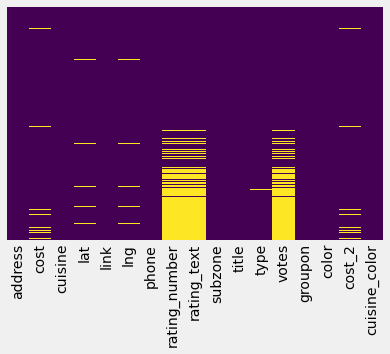

In [172]:
#Load the dataset
df = pd.read_csv("C:/Users/anuma/Downloads/A1_DST/data/zomato_df_final_data.csv")
df.head()
#missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [173]:
# replace the missing values with 0
df['rating_number'].fillna(0, inplace = True)
df['votes'].fillna(0, inplace = True)
df['rating_text'].fillna('No Rating', inplace = True)
# repalce with mean
df['cost'].fillna(df['cost'].mean(),inplace = True)
df['cost_2'].fillna(df['cost_2'].mean(),inplace = True)

df.dropna(inplace =True)

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

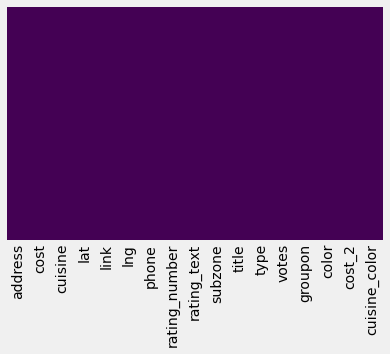

In [174]:
#missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.head()

In [175]:
#To slpit the cuisines
import re
#df['cuisine'][1]
#temp=re.sub('\]|\[|\'', '',df['cuisine'][1]).split(',')
df.cuisine = [(re.sub('\]|\[|\'', '',i).split(',')) for i in df.cuisine]
df['type'] = [(re.sub('\]|\[|\'', '',i).split(',')) for i in df['type']]

In [176]:
#Deleting those columns which are not useful in predictive analysis.
df=df.drop(['address','link','phone','cuisine_color','lat','lng'	,'title','color'], axis=1)


In [177]:
# one-hot-encoding using pandas
df=df.explode('cuisine')
df=df.explode('type')
Restype=pd.get_dummies(df['type'],drop_first=True)
cuisine=pd.get_dummies(df['cuisine'],drop_first=True)
subzone=pd.get_dummies(df['subzone'],drop_first=True)
groupon=pd.get_dummies(df['groupon'],drop_first=True)
df.drop(['type','cuisine','subzone','groupon'],axis=1,inplace=True)
X = pd.concat([df,Restype,cuisine,subzone,groupon],axis=1)

In [178]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18221 entries, 0 to 10498
Columns: 839 entries, cost to True
dtypes: float64(4), object(1), uint8(834)
memory usage: 15.3+ MB


In [179]:
#Declare source and target variables
y=X[['rating_number','rating_text']]
X=X.drop(['rating_number','rating_text'], axis=1)

<AxesSubplot:>

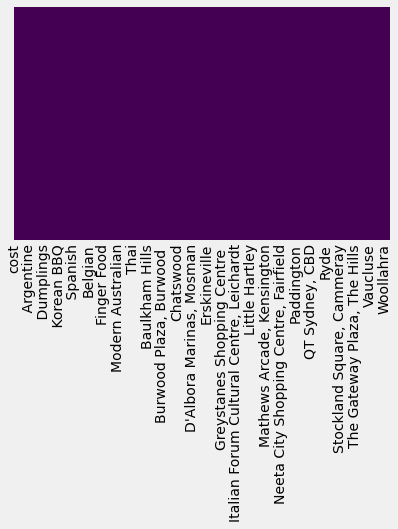

In [180]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y['rating_number'], test_size=0.2)

In [182]:
##### Model training using Linear Regression

In [183]:
# train a Linear regression model on the training set
from sklearn.linear_model import LinearRegression

# instantiate the model
lm = LinearRegression()

# fit the model
lm.fit(X_train,y_train)

C:\Users\anuma\OneDrive\Documents\dataST\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

C:\Users\anuma\OneDrive\Documents\dataST\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'Predicted Y')

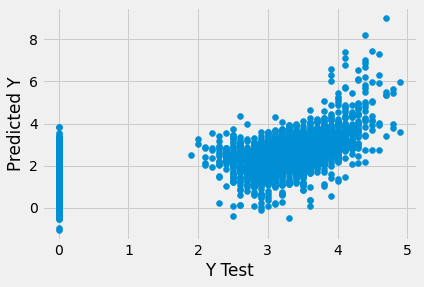

In [184]:
#Predict results

predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [185]:
#Check accuracy score
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.077662551659677
MSE: 1.7157766841440631
RMSE: 1.309876591188675


In [186]:
# convert to binary classification
def categories(C):
    C1 = ['Poor', 'No Rating','Average']
    C2 = ['Very Good', 'Excellent', 'Good',]
    if C in C1:
        return 0
    else:
        return 1


In [187]:
D = y['rating_text'].apply (categories)
pd.unique(D)

array([1, 0], dtype=int64)

In [ ]:
############ Linear model regression with gradient descent

In [188]:
# Create a class for the linear regression with the Gradient Descent as the cost function
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.001, iterations = 1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights=None
    
    def fit(self, X, y):
        
        n_samples=len(X)
        ones=np.ones(len(X))
        features=np.c_[ones,X]
        self.weights=np.zeros(features.shape[1])
        for i in range(self.iterations):
            y_predicted=np.dot(features,self.weights.T)
            error=y_predicted-y
            pd=(2/n_samples)*np.dot(features.T,error)
            self.weights-=self.learning_rate*pd
    def predict (self,X):
        ones=np.ones(len(X))
        features=np.c_[ones,X]
        y_predicted=np.dot(features,self.weights.T)
        return y_predicted

In [189]:
# train/fit a linear regression model to the data
lmgd = GradientDescentLinearRegression()
lmgd.fit (X_train,y_train)

# predict 
predicted = lmgd.predict(X_test)


In [190]:
#Check accuracy score
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.077662551659677
MSE: 1.7157766841440631
RMSE: 1.309876591188675


In [ ]:
################### Model training using Logistic Regression

In [191]:
y['rating_text'] = y['rating_text'].apply (categories)
X_train, X_test, y_train, y_test = train_test_split(X, y['rating_text'], test_size=0.2)

## train a Logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\anuma\OneDrive\Documents\dataST\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\anuma\OneDrive\Documents\dataST\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [192]:
from sklearn.metrics import classification_report
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2665
           1       0.84      0.70      0.76       980

    accuracy                           0.88      3645
   macro avg       0.87      0.82      0.84      3645
weighted avg       0.88      0.88      0.88      3645



C:\Users\anuma\OneDrive\Documents\dataST\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['bool', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [193]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf_matrix=confusion_matrix(y_test,predictions)
print(cf_matrix)

[[2538  127]
 [ 298  682]]


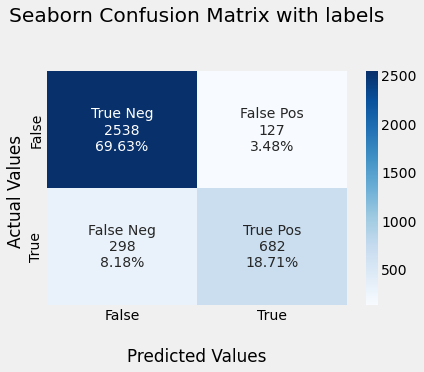

In [194]:
# Print the Confusion Matrix and slice it into four pieces

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()